# Performing a complete analysis on the dataset, including:

Data cleaning <br>
Handling missing values <br>
Outlier detection and handling <br>
Encoding <br>
Scaling <br>
PCA (retaining most of the information)

### Handling Missing Values

In [3]:
import pandas as pd 
import numpy as np 
import numpy.char as char

In [4]:
bc_data = pd.read_csv("/workspaces/Blockchain-Integrated-Machine-Learning-System-for-Cryptocurrency-Fraud-Detection/Week 1 Assignment - Data Analysis/Messy_Employment_India_Dataset.csv")

In [5]:
bc_data

,Status,Age Group,Education,Industry,Location,AI Risk,Years of Experience,Monthly Salary (INR),Date Recorded
0,EMPLOYED,25_34,high school,Technology,Urban,NaN,NaN,40700.0,1/1/2023
1,EMPLOYED,18-24,Diploma,Fintech,rural,moderate,NaN,17500.0,1/2/2023
2,EMPLOYED,25_34,High School,Retail,Delhi,Low,16.0,77600.0,1/3/2023
3,UNEMPLOYED,18-24,Masters,Retail,Urban,Low,30.0,100200.0,1/4/2023
4,NaN,45-54,Diploma,Fintech,Hyderabad,low,9.0,19500.0,1/5/2023
...,...,...,...,...,...,...,...,...,...
1995,employed,25-34,Ph.D,Finance,Hyderabad,Low,NaN,113000.0,6/18/2028
1996,EMPLOYED,25-34,PhD,Tech,NaN,NaN,22.0,102200.0,6/19/2028
1997,NaN,35 - 44,Masters,Education,NaN,low,NaN,31600.0,6/20/2028
1998,EMPLOYED,25_34,high school,Retail,Mumbai,HIGH,22.0,92500.0,6/21/2028


In [12]:
bc_data.head()

,Status,Age Group,Education,Industry,Location,AI Risk,Years of Experience,Monthly Salary (INR),Date Recorded
0,EMPLOYED,25_34,high school,Technology,Urban,NaN,NaN,40700.0,1/1/2023
1,EMPLOYED,18-24,Diploma,Fintech,rural,moderate,NaN,17500.0,1/2/2023
2,EMPLOYED,25_34,High School,Retail,Delhi,Low,16.0,77600.0,1/3/2023
3,UNEMPLOYED,18-24,Masters,Retail,Urban,Low,30.0,100200.0,1/4/2023
4,NaN,45-54,Diploma,Fintech,Hyderabad,low,9.0,19500.0,1/5/2023


In [6]:
bc_data.head(6)

,Status,Age Group,Education,Industry,Location,AI Risk,Years of Experience,Monthly Salary (INR),Date Recorded
0,EMPLOYED,25_34,high school,Technology,Urban,NaN,NaN,40700.0,1/1/2023
1,EMPLOYED,18-24,Diploma,Fintech,rural,moderate,NaN,17500.0,1/2/2023
2,EMPLOYED,25_34,High School,Retail,Delhi,Low,16.0,77600.0,1/3/2023
3,UNEMPLOYED,18-24,Masters,Retail,Urban,Low,30.0,100200.0,1/4/2023
4,NaN,45-54,Diploma,Fintech,Hyderabad,low,9.0,19500.0,1/5/2023
5,Unemployed,25_34,PhD,Tech,Bangalore,HIGH,NaN,54500.0,1/6/2023


In [13]:
missing_value_count = bc_data.isnull().sum()

In [14]:
missing_value_count

Status                   268
Age Group                232
Education                196
Industry                 201
Location                 213
AI Risk                  284
Years of Experience     1020
Monthly Salary (INR)     387
Date Recorded              0
dtype: int64

In [23]:
missing_value_count[0:10]

Status                   268
Age Group                232
Education                196
Industry                 201
Location                 213
AI Risk                  284
Years of Experience     1020
Monthly Salary (INR)     387
Date Recorded              0
dtype: int64

In [8]:
total_cells = np.prod(bc_data.shape)
total_cells

np.int64(18000)

In [15]:
total_missing = missing_value_count.sum()
total_missing

np.int64(2801)

In [16]:
#Percentage of data that is missing
percent_missing = (total_missing/total_cells)*100
print(percent_missing)

15.561111111111112


In [18]:
# look at the # of missing points in the first ten columns
missing_value_count[0:10]

Status                   268
Age Group                232
Education                196
Industry                 201
Location                 213
AI Risk                  284
Years of Experience     1020
Monthly Salary (INR)     387
Date Recorded              0
dtype: int64

In [ ]:
# remove all the rows that contain a missing value
# bc_data.dropna()

,Status,Age Group,Education,Industry,Location,AI Risk,Years of Experience,Monthly Salary (INR),Date Recorded
2,EMPLOYED,25_34,High School,Retail,Delhi,Low,16.0,77600.0,1/3/2023
3,UNEMPLOYED,18-24,Masters,Retail,Urban,Low,30.0,100200.0,1/4/2023
15,UNEMPLOYED,18-24,Bachelors,Healthcare,Bangalore,moderate,18.0,28700.0,1/16/2023
24,Unemployed,25_34,Ph.D,Technology,Hyderabad,moderate,24.0,107700.0,1/25/2023
29,employed,18-24,Master,Health,Urban,Low,15.0,13300.0,1/30/2023
...,...,...,...,...,...,...,...,...,...
1978,Employed,45-54,Ph.D,Retail,suburban,High,18.0,143000.0,6/1/2028
1979,employed,18 to 24,PhD,Finance,Bangalore,moderate,16.0,106600.0,6/2/2028
1988,EMPLOYED,25-34,Ph.D,Healthcare,Mumbai,Medium,26.0,49200.0,6/11/2028
1990,Unemployed,18 to 24,PhD,Healthcare,rural,moderate,19.0,146200.0,6/13/2028


In [21]:
# remove all columns with at least one missing value
columns_with_na_dropped = bc_data.dropna(axis=1)
columns_with_na_dropped.head()


,Date Recorded
0,1/1/2023
1,1/2/2023
2,1/3/2023
3,1/4/2023
4,1/5/2023


In [23]:
# just how much data did we lose?
print("Columns in original dataset: %d \n" % bc_data.shape[1])
print("Columns with na's dropped: %d" % columns_with_na_dropped.shape[1])

Columns in original dataset: 9 

Columns with na's dropped: 1


In [24]:
#Fill misiing value automatically

In [32]:
subset_bc_data = bc_data['Years of Experience']
subset_bc_data

0        NaN
1        NaN
2       16.0
3       30.0
4        9.0
        ... 
1995     NaN
1996    22.0
1997     NaN
1998    22.0
1999     NaN
Name: Years of Experience, Length: 2000, dtype: float64

In [33]:
subset_bc_data.fillna(0)

0        0.0
1        0.0
2       16.0
3       30.0
4        9.0
        ... 
1995     0.0
1996    22.0
1997     0.0
1998    22.0
1999     0.0
Name: Years of Experience, Length: 2000, dtype: float64

In [35]:
subset_bc_data.fillna(method='bfill', axis = 0).fillna(0)

/tmp/ipykernel_6488/3626028888.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset_bc_data.fillna(method='bfill', axis = 0).fillna(0)


0       16.0
1       16.0
2       16.0
3       30.0
4        9.0
        ... 
1995    22.0
1996    22.0
1997    22.0
1998    22.0
1999     0.0
Name: Years of Experience, Length: 2000, dtype: float64

### Scaling and Normalization

In [38]:
import scipy
print(scipy.__version__)

1.16.3


In [39]:
from scipy import stats

In [41]:
import mlxtend
from mlxtend.preprocessing import minmax_scaling

In [43]:
import seaborn as sns

In [44]:
import matplotlib.pyplot as plt

In [46]:
# generate 1000 data points randomly drawn from an exponential distribution
original_data = np.random.exponential(size=1000)
original_data

array([6.84746497e-01, 2.03962322e-01, 1.09353172e+00, 8.97297272e-01,
       6.14652808e-01, 1.03094734e-01, 1.71246763e+00, 1.17642030e+00,
       3.72319569e-03, 1.24595875e-02, 3.18342396e+00, 3.06284392e+00,
       1.19617428e+00, 1.05678467e+00, 1.25269457e+00, 4.03480395e+00,
       6.78947214e-01, 5.94936035e-01, 5.69182369e-01, 2.38838572e-01,
       2.29212965e-01, 3.34797025e-01, 7.64311951e-02, 3.66029655e+00,
       1.42447616e-01, 1.33801912e+00, 1.82006183e+00, 3.74435939e-01,
       1.55781580e-01, 6.76731525e-01, 1.35542443e+00, 1.45713432e+00,
       4.45240073e-02, 4.65677434e+00, 6.03110178e-01, 1.11534436e+00,
       7.76544860e-01, 1.29523243e-01, 1.79224133e-01, 1.41061649e-01,
       1.85214790e+00, 5.84205305e-01, 2.39903402e+00, 2.26132397e-01,
       6.96759720e-01, 2.43268594e-01, 1.21773780e+00, 1.43858849e-02,
       1.87969082e+00, 1.16160675e+00, 1.01618379e-01, 2.62591061e+00,
       3.18803347e-02, 5.31039252e-01, 2.69622767e-01, 1.06116907e+00,
      

In [48]:
scaled_data = minmax_scaling(original_data, columns=[0])
scaled_data

array([[9.41725214e-02],
       [2.79490721e-02],
       [1.50478799e-01],
       [1.23449370e-01],
       [8.45177822e-02],
       [1.40555209e-02],
       [2.35731336e-01],
       [1.61895913e-01],
       [3.68036250e-04],
       [1.57139116e-03],
       [4.38341587e-01],
       [4.21732832e-01],
       [1.64616836e-01],
       [1.45417242e-01],
       [1.72401969e-01],
       [5.55611086e-01],
       [9.33737252e-02],
       [8.18019841e-02],
       [7.82546615e-02],
       [3.27529441e-02],
       [3.14271082e-02],
       [4.59703087e-02],
       [1.03828719e-02],
       [5.04026253e-01],
       [1.94760063e-02],
       [1.84154614e-01],
       [2.50551415e-01],
       [5.14301922e-02],
       [2.13126330e-02],
       [9.30685352e-02],
       [1.86552030e-01],
       [2.00561601e-01],
       [5.98796015e-03],
       [6.41281594e-01],
       [8.29278946e-02],
       [1.53483283e-01],
       [1.06816873e-01],
       [1.76957967e-02],
       [2.45416218e-02],
       [1.92851025e-02],


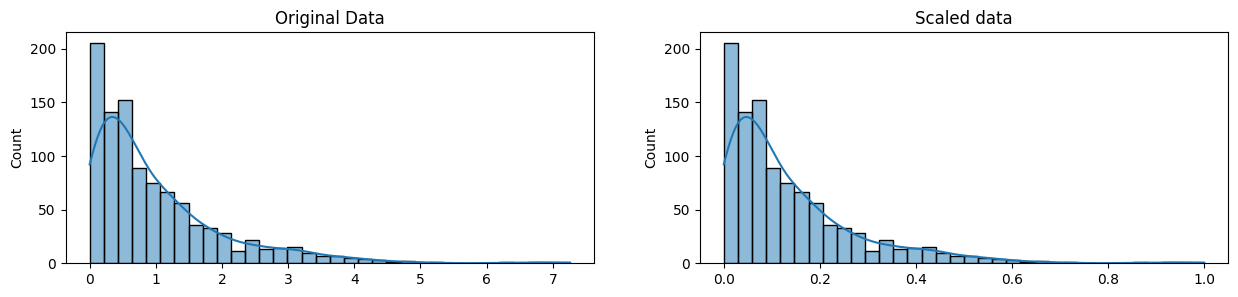

In [49]:
# plot both together to compare
fig, ax = plt.subplots(1, 2, figsize=(15, 3))
sns.histplot(original_data, ax=ax[0], kde=True, legend=False)
ax[0].set_title("Original Data")
sns.histplot(scaled_data, ax=ax[1], kde=True, legend=False)
ax[1].set_title("Scaled data")
plt.show()

In [54]:
# normalizing the exponential data with boxcox

In [52]:
normalized_data = stats.boxcox(original_data)
normalized_data

(array([-3.60605349e-01, -1.30142326e+00,  9.04632272e-02, -1.06850999e-01,
        -4.57075324e-01, -1.71430745e+00,  5.77498688e-01,  1.65967737e-01,
        -2.94269804e+00, -2.61254020e+00,  1.35182361e+00,  1.29985866e+00,
         1.83378488e-01,  5.56306670e-02,  2.32047476e-01,  1.68249517e+00,
        -3.68302218e-01, -4.85670668e-01, -5.24096213e-01, -1.19497214e+00,
        -1.22313686e+00, -9.51946077e-01, -1.87347550e+00,  1.54410193e+00,
        -1.52778603e+00,  3.02532547e-01,  6.48171517e-01, -8.66590993e-01,
        -1.47332619e+00, -3.71255735e-01,  3.16500213e-01,  3.95573709e-01,
        -2.13122345e+00,  1.89267408e+00, -4.73731901e-01,  1.10731997e-01,
        -2.44740903e-01, -1.58429784e+00, -1.38541149e+00, -1.53366006e+00,
         6.68647820e-01, -5.01528946e-01,  9.82970330e-01, -1.23233518e+00,
        -3.44813297e-01, -1.18229115e+00,  2.02143164e-01, -2.56586387e+00,
         6.86016705e-01,  1.52769048e-01, -1.72226748e+00,  1.09784548e+00,
        -2.2

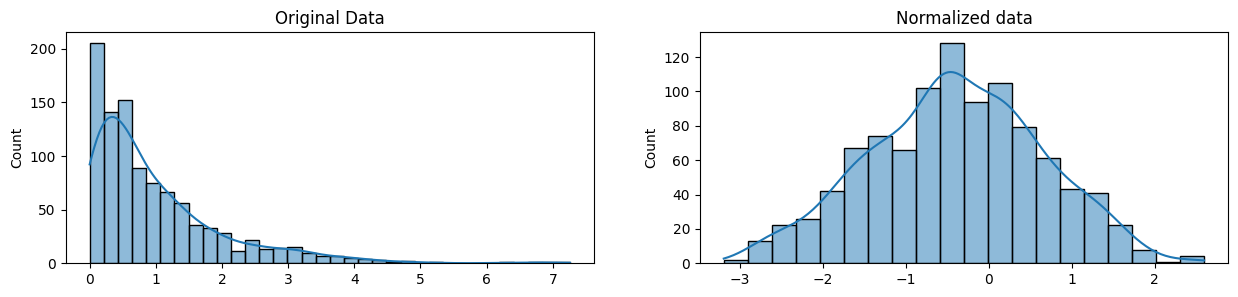

In [53]:
# plot both together to compare
fig, ax=plt.subplots(1, 2, figsize=(15, 3))
sns.histplot(original_data, ax=ax[0], kde=True, legend=False)
ax[0].set_title("Original Data")
sns.histplot(normalized_data[0], ax=ax[1], kde=True, legend=False)
ax[1].set_title("Normalized data")
plt.show()